In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import EarlyStopping

plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams.update({'font.size':20})
plt.rcParams["figure.figsize"] = (12,10)

In [66]:
str_files = ''
#Carrega os dados do arquivo .csv
ugrhi06 = pd.read_csv(str_files + "cetesb_concatenado06semoutliers.csv",encoding='utf-8',sep=',',index_col=[0])

#Carrega os dados do arquivo .csv
ugrhi10 = pd.read_csv(str_files + "cetesb_concatenado10semoutliers.csv",encoding='utf-8',sep=',',index_col=[0])

In [67]:
print('---- Tamanho dos conjuntos originais ----')
print('X:',len(ugrhi06))
print('y:',len(ugrhi10))

#Seleciona os dados equivalente ao tamanho da URGHI10
ugrhi06 = ugrhi06.iloc[0:len(ugrhi10)]

print('---- Conjunto de dados y igualado ao tamanho de dados do conjunto X ----')
print('X:',len(ugrhi06))
print('y:',len(ugrhi10))

def seleciona_colunas(trainingd,p):
    
    if (p == 'ph'):
    
        fph      = trainingd.iloc[:,0:1].values
        
        frame_completo = pd.DataFrame(list(zip(fph)),columns =['ph']) 
    
    else:
        
        fod      = trainingd.iloc[:,4:5].values
        
        frame_completo = pd.DataFrame(list(zip(fod)),columns =['od'])          
    
    return frame_completo

def seleciona_colunas_od(trainingd):
    
    fod      = trainingd.iloc[:,4:5].values
        
    frame_completo = pd.DataFrame(list(zip(fod)),columns =['od'])         
    
    return frame_completo

def prepara_x_y_train_previsao(df6,df10,p):
    
    if (p == 'ph'):
        
        X = df6['ph'].values
        y = df10['ph'].values
        train_previsao = df6['ph'].values
    
        X = X.reshape(len(X),1)
        y = y.reshape(len(y),1)
        train_previsao = train_previsao.reshape(len(train_previsao),1)
    else:
        
        X = df6['od'].values
        y = df10['od'].values
        train_previsao = df6['od'].values
    
        X = X.reshape(len(X),1)
        y = y.reshape(len(y),1)
        train_previsao = train_previsao.reshape(len(train_previsao),1)
           

    return X,y,train_previsao
    
'''
df_ugrhi06 = seleciona_colunas(ugrhi06)

#Seleciona os dados equivalente ao tamanho da URGHI10
X = df_ugrhi06.iloc[0:398]
#Remove a coluna ph, pois os seus valores serão preditos na UGRHI10
X = X.drop(['ph'],axis = 1).values
#Seleciona os valores da coluna ph da URGHI06, na qual será utilizado para a normalização dos dados quando apresentar o gráfico
train_previsao = ugrhi06['ph'].values
#Seleciona os valores da coluna ph da URGHI10.
y = ugrhi10['ph'].values

X = X.reshape(len(X),3)
y = y.reshape(len(y),1)
train_previsao = train_previsao.reshape(len(train_previsao),1)


assert X.shape == (len(X),3)
assert y.shape == (len(y),1)



print('---- Conjunto de dados y igualado ao tamanho de dados do conjunto X ----')
print('X:',len(X))
print('y:',len(y))
'''

---- Tamanho dos conjuntos originais ----
X: 503
y: 502
---- Conjunto de dados y igualado ao tamanho de dados do conjunto X ----
X: 502
y: 502


"\ndf_ugrhi06 = seleciona_colunas(ugrhi06)\n\n#Seleciona os dados equivalente ao tamanho da URGHI10\nX = df_ugrhi06.iloc[0:398]\n#Remove a coluna ph, pois os seus valores serão preditos na UGRHI10\nX = X.drop(['ph'],axis = 1).values\n#Seleciona os valores da coluna ph da URGHI06, na qual será utilizado para a normalização dos dados quando apresentar o gráfico\ntrain_previsao = ugrhi06['ph'].values\n#Seleciona os valores da coluna ph da URGHI10.\ny = ugrhi10['ph'].values\n\nX = X.reshape(len(X),3)\ny = y.reshape(len(y),1)\ntrain_previsao = train_previsao.reshape(len(train_previsao),1)\n\n\nassert X.shape == (len(X),3)\nassert y.shape == (len(y),1)\n\n\n\nprint('---- Conjunto de dados y igualado ao tamanho de dados do conjunto X ----')\nprint('X:',len(X))\nprint('y:',len(y))\n"

In [68]:
df_ugrhi06 = seleciona_colunas(ugrhi06,'od')

X,y,train_previsao = prepara_x_y_train_previsao(df_ugrhi06,ugrhi10,'od')

#Normalização dos dados: Normaliza os dados dentro um intervalo (0 a 1).
sc = MinMaxScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

#Normalização dos dados de previsão para teste
normalizador_previsao = MinMaxScaler()
normalizador_previsao.fit_transform(train_previsao)

array([[0.30350538],
       [0.31960675],
       [0.33743327],
       [0.35468474],
       [0.37251126],
       [0.38976273],
       [0.40758925],
       [0.42541576],
       [0.44266723],
       [0.46049375],
       [0.47774522],
       [0.49557174],
       [0.51339826],
       [0.60515388],
       [0.63896733],
       [0.32000231],
       [0.31585317],
       [0.6329165 ],
       [0.84946723],
       [0.47149204],
       [0.48318073],
       [0.48318073],
       [0.48318073],
       [0.48318073],
       [0.92335619],
       [0.47061196],
       [0.33844292],
       [0.7675474 ],
       [0.1429724 ],
       [0.34247681],
       [0.07745058],
       [0.53428802],
       [0.58394698],
       [0.63526125],
       [0.68492021],
       [0.73623448],
       [0.78754874],
       [0.37837838],
       [0.42638161],
       [0.35740218],
       [0.6870439 ],
       [0.1924163 ],
       [0.24374098],
       [0.29506566],
       [0.34473471],
       [0.39605939],
       [0.44572844],
       [0.497

In [69]:
#Funções para cálculos das métricas de desempenho e ajuste da estrutura dos dados.
'''
def mape(y_pred,y_true):
    mape_sum = 0
    for real,prediction in zip(y_true,y_pred):
        mape_sum += (abs((real - prediction))/real)
        mape = mape_sum/len(real)
    return mape
'''

def mape(y_pred,y_true):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    return mape

def rmse(y_pred,y_true):
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return rmse

def r2(y_pred,y_true):
    rscore = r2_score(y_true,y_pred)
    return rscore

#Função para calcular o coeficiente de determinação entre os valores observados e preditos.
#Calcula-se a correlação entre os valores observados e preditos e eleva ao expoente 2.
def correlacao_determinacao(dtframe,tipo):
    
    if (tipo == 0): #Treino
        resultado = dtframe.corr().previsao_treino.values[1] ** 2 
        
    else: #teste
        resultado = dtframe.corr().previsao_teste.values[1] ** 2
            
    return resultado

def pegar_dados_coluna_test(trainingd,percent,index_coluna):
    data = trainingd.iloc[:,:].values
    train_previsao = trainingd.iloc[0:int(len(data)*percent),index_coluna:index_coluna+1].values
           
    return train_previsao

def ajusta_lista(array):
    lista = []
    
    for i in range(len(array)):
        lista.append(array[i][0])
            
    return lista

#Monta o Dataframe para calcular a correlação e coeficiente de determinação entre os valores observados e preditos.
def df_correlacao(previsoes_treino,treino,previsoes,observado_test):
    
    #print(ajusta_lista(treino))
    
    df_corr_determinacao_treino = pd.DataFrame()
    df_corr_determinacao_teste  = pd.DataFrame()
      
    #Calcula o coeficiente de determinação
    
    dict = {'previsao_treino': ajusta_lista(previsoes_treino), 'treino': ajusta_lista(treino)} 
        
    df_treino = pd.DataFrame(dict)
    dframes_treino = [df_corr_determinacao_treino,df_treino]
    df_corr_determinacao_treino = pd.concat(dframes_treino)
    
    dict = {'previsao_teste': ajusta_lista(previsoes), 'teste': ajusta_lista(observado_test)} 
    
    df_teste = pd.DataFrame(dict)
    dframes_teste = [df_corr_determinacao_teste,df_teste]
    df_corr_determinacao_teste = pd.concat(dframes_teste)
    
    r_treino = round(correlacao_determinacao(df_corr_determinacao_treino,0),4)
    r_teste  = round(correlacao_determinacao(df_corr_determinacao_teste,1),4)
                
    return r_treino,r_teste

In [70]:
#Separação dos dados para treinamento(70%) e teste(30%)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

REGRESSÃO LINEAR
RANDON FOREST


/home/anderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


MLP LINEAR
Epoch 00023: early stopping


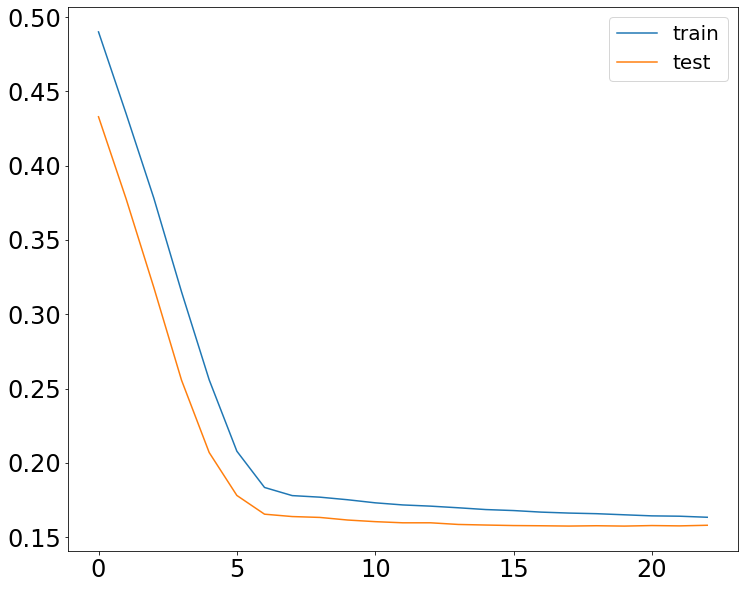

MLP RELU
Epoch 00004: early stopping


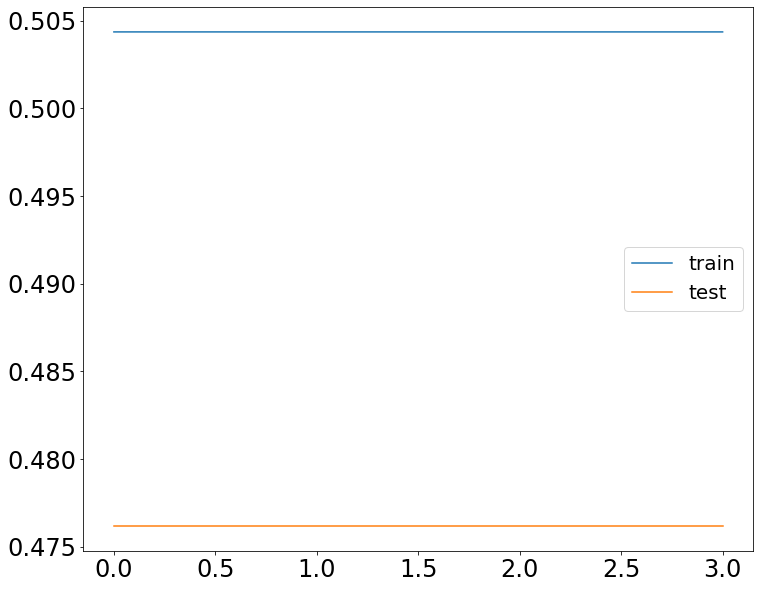

MLP SIGMOID
Epoch 00015: early stopping


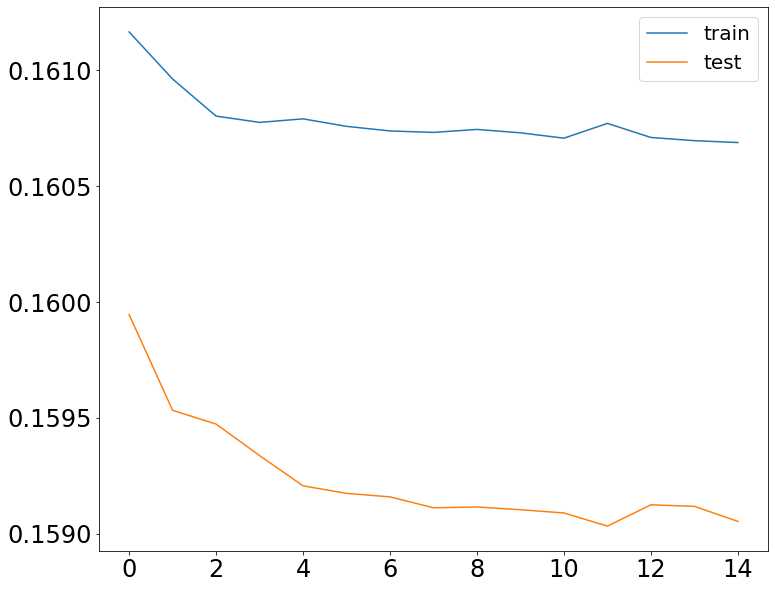

LSTM LINEAR
Epoch 00019: early stopping


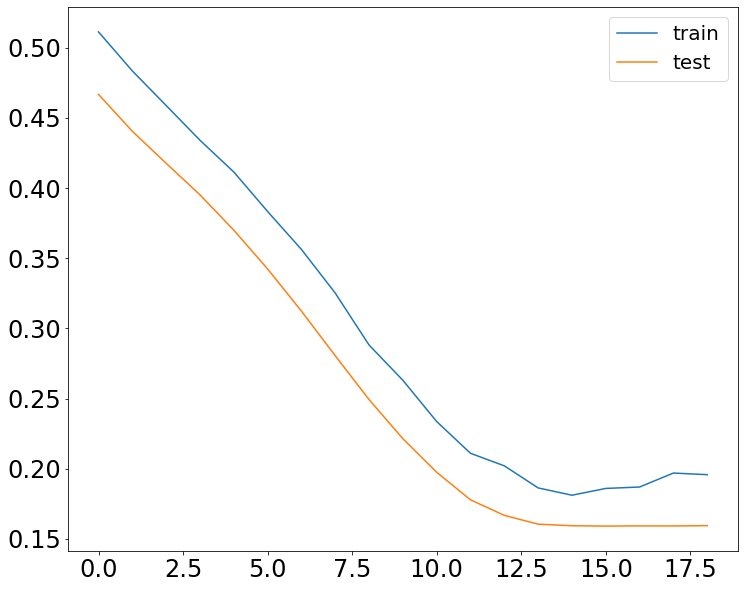

LSTM RELU
Epoch 00014: early stopping


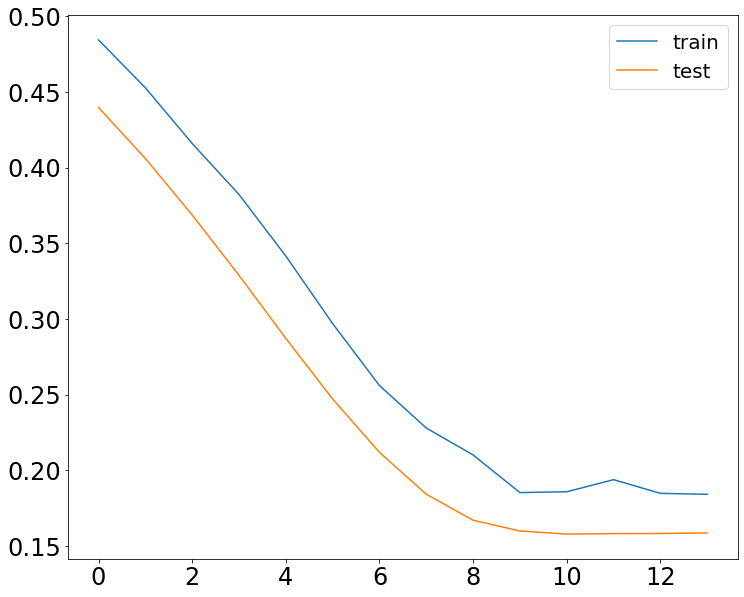

LSTM SIGMOID
Epoch 00006: early stopping


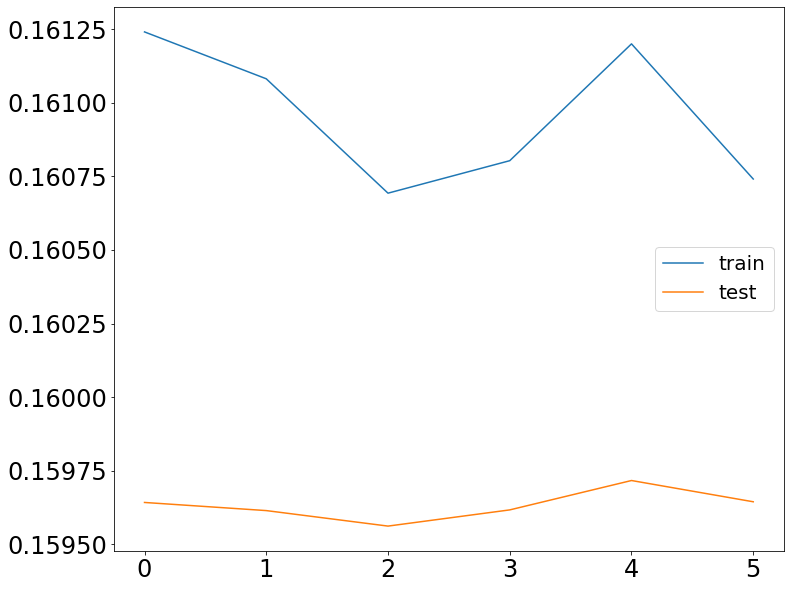

In [71]:
am = ['rl','rf','mlp_linear','mlp_relu','mlp_sigmoid','lstm_linear','lstm_relu','lstm_sigmoid']

for t in am:
    if t == 'rl':
        print('REGRESSÃO LINEAR')
        model = LinearRegression()
        
        #Treina o modelo
        model.fit(X_train,y_train)
        
        #Predição dos dados de teste
        y_pred = model.predict(X_test)

        y_pred_rl = sc.inverse_transform(y_pred)

        X_test_rl = sc.inverse_transform(X_test)
        y_test_rl = sc.inverse_transform(y_test)
        
        #Predição dos dados de treinamento
        y_predt = model.predict(X_train)
        y_predt_rl = sc.inverse_transform(y_predt)
        
        y_train_rl = sc.inverse_transform(y_train)
        
        '''
        plt.plot(y_test_rl,color='red', label='pH Observado')
        plt.plot(y_pred_rl,color='blue', label='pH predito')
        plt.xlabel('Semanas')
        plt.ylabel('Valor de pH')
        plt.legend()
        plt.title('Predição Regressão Linear')
        plt.show()
        '''
        
        mape_treino_rl       = round(mape(y_predt_rl,y_train_rl),4)
        rmse_treino_rl       = round(rmse(y_predt_rl,y_train_rl),4)
                
        mape_teste_rl        = round(mape(y_pred_rl,y_test_rl),4)
        rmse_teste_rl        = round(rmse(y_pred_rl,y_test_rl),4)
                
        r_treino_rl,r_teste_rl = df_correlacao(y_predt_rl,y_train_rl,y_pred_rl,y_test_rl)
                        
    elif t == 'rf':
        print('RANDON FOREST')
        
        model = RandomForestRegressor()
        
        #Treina o modelo
        model.fit(X_train,y_train)

        #Predição dados de teste
        y_pred = model.predict(X_test)
                
        y_pred_rf = sc.inverse_transform(y_pred.reshape(-1, 1))
        
        X_test_rf = sc.inverse_transform(X_test)
        y_test_rf = sc.inverse_transform(y_test)
        
        #Predição dados de treinamento
        
        y_predt = model.predict(X_train)
        y_predt_rf = sc.inverse_transform(y_predt.reshape(-1, 1))
        
        y_train_rf = sc.inverse_transform(y_train)
        
        '''
        plt.plot(y_test_rf,color='red', label='pH Observado')
        plt.plot(y_pred_rf,color='blue', label='pH predito')
        plt.xlabel('Semanas')
        plt.ylabel('Valor de pH')
        plt.legend()
        plt.title('Predição Random Forest')
        plt.show()
        '''
        
        mape_treino_rf       = round(mape(y_predt_rf,y_train_rf),4)
        rmse_treino_rf       = round(rmse(y_predt_rf,y_train_rf),4)
        
        mape_teste_rf        = round(mape(y_pred_rf,y_test_rf),4)
        rmse_teste_rf        = round(rmse(y_pred_rf,y_test_rf),4)
                
        r_treino_rf,r_teste_rf = df_correlacao(y_predt_rf,y_train_rf,y_pred_rf,y_test_rf)
        
    elif t == 'mlp_linear':
        
        print('MLP LINEAR')
                               
        model = Sequential()
        model.add(Dense(units = 10, activation = 'relu'))
        model.add(Dense(units = 21, activation = 'relu'))
        model.add(Dense(units = 1, activation = 'linear'))
        model.compile(loss = 'mean_absolute_error', optimizer = 'adam',
                  metrics = ['mean_absolute_error'])
        
        es = EarlyStopping(monitor='val_loss', patience = 3, verbose=1)


        #Treina o modelo
        history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size = 32, epochs = 2000, 
                        callbacks=[es], verbose=0)

        #Treina o modelo
        #model.fit(X_train,y_train, batch_size = 32, epochs = 100)
        
        #Predição com os dados de test
        y_pred = model.predict(X_test)
        y_pred_mlp = normalizador_previsao.inverse_transform(y_pred)

        X_test_mlp = sc.inverse_transform(X_test)
        y_test_mlp = sc.inverse_transform(y_test)
        
        #Predição com os dados de treinamento
        y_predt = model.predict(X_train)
        y_predt_mlp = normalizador_previsao.inverse_transform(y_predt)
        
        y_train_mlp = sc.inverse_transform(y_train)
        
        '''
        plt.plot(y_test_mlp,color='red', label='pH Observado')
        plt.plot(y_pred_mlp,color='blue', label='pH predito')
        plt.xlabel('Semanas')
        plt.ylabel('Valor de pH')
        plt.legend()
        plt.title('Predição MLP')
        plt.show()
        '''
        
        mape_treino_mlp_linear       = round(mape(y_predt_mlp,y_train_mlp),4)
        rmse_treino_mlp_linear       = round(rmse(y_predt_mlp,y_train_mlp),4)
        
        mape_teste_mlp_linear        = round(mape(y_pred_mlp,y_test_mlp),4)
        rmse_teste_mlp_linear        = round(rmse(y_pred_mlp,y_test_mlp),4)
        
        r_treino_mlp_linear,r_teste_mlp_linear = df_correlacao(y_predt_mlp,y_train_mlp,y_pred_mlp,y_test_mlp)
        
        # plot training history
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='test')
        plt.legend()
        plt.show()
    
    elif t == 'mlp_relu':
        
        print('MLP RELU')
                               
        model = Sequential()
        model.add(Dense(units = 10, activation = 'relu'))
        model.add(Dense(units = 21, activation = 'relu'))
        model.add(Dense(units = 1, activation = 'relu'))
        model.compile(loss = 'mean_absolute_error', optimizer = 'adam',
                  metrics = ['mean_absolute_error'])
        
        es = EarlyStopping(monitor='val_loss', patience = 3, verbose=1)


        #Treina o modelo
        history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size = 32, epochs = 2000, 
                        callbacks=[es], verbose=0)

        #Treina o modelo
        #model.fit(X_train,y_train, batch_size = 32, epochs = 100)
        
        #Predição com os dados de test
        y_pred = model.predict(X_test)
        y_pred_mlp = normalizador_previsao.inverse_transform(y_pred)

        X_test_mlp = sc.inverse_transform(X_test)
        y_test_mlp = sc.inverse_transform(y_test)
        
        #Predição com os dados de treinamento
        y_predt = model.predict(X_train)
        y_predt_mlp = normalizador_previsao.inverse_transform(y_predt)
        
        y_train_mlp = sc.inverse_transform(y_train)
        
        '''
        plt.plot(y_test_mlp,color='red', label='pH Observado')
        plt.plot(y_pred_mlp,color='blue', label='pH predito')
        plt.xlabel('Semanas')
        plt.ylabel('Valor de pH')
        plt.legend()
        plt.title('Predição MLP')
        plt.show()
        
        '''
        
        mape_treino_mlp_relu       = round(mape(y_predt_mlp,y_train_mlp),4)
        rmse_treino_mlp_relu       = round(rmse(y_predt_mlp,y_train_mlp),4)
        
        mape_teste_mlp_relu        = round(mape(y_pred_mlp,y_test_mlp),4)
        rmse_teste_mlp_relu        = round(rmse(y_pred_mlp,y_test_mlp),4)
        
        r_treino_mlp_relu,r_teste_mlp_relu = df_correlacao(y_predt_mlp,y_train_mlp,y_pred_mlp,y_test_mlp)
        
        # plot training history
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='test')
        plt.legend()
        plt.show()
    
    elif t == 'mlp_sigmoid':
        
        print('MLP SIGMOID')
                               
        model = Sequential()
        model.add(Dense(units = 10, activation = 'relu'))
        model.add(Dense(units = 21, activation = 'relu'))
        model.add(Dense(units = 1, activation = 'sigmoid'))
        model.compile(loss = 'mean_absolute_error', optimizer = 'adam',
                  metrics = ['mean_absolute_error'])
        
        es = EarlyStopping(monitor='val_loss', patience = 3, verbose=1)


        #Treina o modelo
        history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size = 32, epochs = 2000, 
                        callbacks=[es], verbose=0)

        #Treina o modelo
        #model.fit(X_train,y_train, batch_size = 32, epochs = 100)
        
        #Predição com os dados de test
        y_pred = model.predict(X_test)
        y_pred_mlp = normalizador_previsao.inverse_transform(y_pred)

        X_test_mlp = sc.inverse_transform(X_test)
        y_test_mlp = sc.inverse_transform(y_test)
        
        #Predição com os dados de treinamento
        y_predt = model.predict(X_train)
        y_predt_mlp = normalizador_previsao.inverse_transform(y_predt)
        
        y_train_mlp = sc.inverse_transform(y_train)
        
        '''
        plt.plot(y_test_mlp,color='red', label='pH Observado')
        plt.plot(y_pred_mlp,color='blue', label='pH predito')
        plt.xlabel('Semanas')
        plt.ylabel('Valor de pH')
        plt.legend()
        plt.title('Predição MLP')
        plt.show()
        '''
        
        mape_treino_mlp_sigmoid       = round(mape(y_predt_mlp,y_train_mlp),4)
        rmse_treino_mlp_sigmoid       = round(rmse(y_predt_mlp,y_train_mlp),4)
        
        mape_teste_mlp_sigmoid        = round(mape(y_pred_mlp,y_test_mlp),4)
        rmse_teste_mlp_sigmoid        = round(rmse(y_pred_mlp,y_test_mlp),4)
        
        r_treino_mlp_sigmoid,r_teste_mlp_sigmoid = df_correlacao(y_predt_mlp,y_train_mlp,y_pred_mlp,y_test_mlp)
        
        # plot training history
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='test')
        plt.legend()
        plt.show()
    
    elif t == 'lstm_linear':
        
        print('LSTM LINEAR')
        
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        
        model = Sequential()
        model.add(LSTM(units = 10, input_shape = (X_train.shape[1], 1)))
        model.add(Dense(10, activation = 'relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation = 'linear'))
        model.compile(loss = 'mean_absolute_error', optimizer = 'adam',
                  metrics = ['mean_absolute_error'])
        
        es = EarlyStopping(monitor='val_loss', patience = 3, verbose=1)


        #Treina o modelo
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 32, epochs = 2000, 
                        callbacks=[es], verbose=0)

        #Treina o modelo
        #model.fit(X_train,y_train, batch_size = 32, epochs = 100)

        #Predição com dados de teste
        y_pred = model.predict(X_test)
        y_pred_lstm_l = sc.inverse_transform(y_pred)

        y_test_lstm = sc.inverse_transform(y_test)
        y_test_lstm.shape
        
        #Predição com dados de treinamento
        y_predt = model.predict(X_train)
        y_predt_lstm = sc.inverse_transform(y_predt)

        y_train_lstm = sc.inverse_transform(y_train)
        
        '''
        plt.plot(y_test_lstm,color='red', label='pH Observado')
        plt.plot(y_pred_lstm,color='blue', label='pH predito')
        plt.xlabel('Semanas')
        plt.ylabel('Valor de pH')
        plt.legend()
        plt.title('Predição LSTM')
        plt.show()
        '''
        
        mape_treino_lstm_linear       = round(mape(y_predt_lstm,y_train_lstm),4)
        rmse_treino_lstm_linear       = round(rmse(y_predt_lstm,y_train_lstm),4)
                
        mape_teste_lstm_linear        = round(mape(y_pred_lstm,y_test_lstm),4)
        rmse_teste_lstm_linear        = round(rmse(y_pred_lstm,y_test_lstm),4)
                
        r_treino_lstm_linear,r_teste_lstm_linear = df_correlacao(y_predt_lstm,y_train_lstm,y_pred_lstm,y_test_lstm)
        
        # plot training history
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='test')
        plt.legend()
        plt.show()
    
    elif t == 'lstm_relu':
        
        print('LSTM RELU')
        
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        
        model = Sequential()
        model.add(LSTM(units = 10, input_shape = (X_train.shape[1], 1)))
        model.add(Dense(10, activation = 'relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation = 'relu'))
        model.compile(loss = 'mean_absolute_error', optimizer = 'adam',
                  metrics = ['mean_absolute_error'])
        
        es = EarlyStopping(monitor='val_loss', patience = 3, verbose=1)


        #Treina o modelo
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 32, epochs = 2000, 
                        callbacks=[es], verbose=0)

        #Treina o modelo
        #model.fit(X_train,y_train, batch_size = 32, epochs = 100)

        #Predição com dados de teste
        y_pred = model.predict(X_test)
        y_pred_lstm = sc.inverse_transform(y_pred)

        y_test_lstm = sc.inverse_transform(y_test)
        y_test_lstm.shape
        
        #Predição com dados de treinamento
        y_predt = model.predict(X_train)
        y_predt_lstm = sc.inverse_transform(y_predt)

        y_train_lstm = sc.inverse_transform(y_train)
        
        '''
        plt.plot(y_test_lstm,color='red', label='pH Observado')
        plt.plot(y_pred_lstm,color='blue', label='pH predito')
        plt.xlabel('Semanas')
        plt.ylabel('Valor de pH')
        plt.legend()
        plt.title('Predição LSTM')
        plt.show()
        
        '''
        
        mape_treino_lstm_relu       = round(mape(y_predt_lstm,y_train_lstm),4)
        rmse_treino_lstm_relu       = round(rmse(y_predt_lstm,y_train_lstm),4)
                
        mape_teste_lstm_relu        = round(mape(y_pred_lstm,y_test_lstm),4)
        rmse_teste_lstm_relu        = round(rmse(y_pred_lstm,y_test_lstm),4)
                
        r_treino_lstm_relu,r_teste_lstm_relu = df_correlacao(y_predt_lstm,y_train_lstm,y_pred_lstm,y_test_lstm)
    
        # plot training history
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='test')
        plt.legend()
        plt.show()
    
    else:
        
        print('LSTM SIGMOID')
        
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        
        model = Sequential()
        model.add(LSTM(units = 10, input_shape = (X_train.shape[1], 1)))
        model.add(Dense(10, activation = 'relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation = 'sigmoid'))
        model.compile(loss = 'mean_absolute_error', optimizer = 'adam',
                  metrics = ['mean_absolute_error'])

        es = EarlyStopping(monitor='val_loss', patience = 3, verbose=1)


        #Treina o modelo
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size = 32, epochs = 2000, 
                        callbacks=[es], verbose=0)

        #Predição com dados de teste
        y_pred = model.predict(X_test)
        y_pred_lstm = sc.inverse_transform(y_pred)

        y_test_lstm = sc.inverse_transform(y_test)
        y_test_lstm.shape
        
        #Predição com dados de treinamento
        y_predt = model.predict(X_train)
        y_predt_lstm = sc.inverse_transform(y_predt)

        y_train_lstm = sc.inverse_transform(y_train)
        
        '''
        plt.plot(y_test_lstm,color='red', label='pH Observado')
        plt.plot(y_pred_lstm,color='blue', label='pH predito')
        plt.xlabel('Semanas')
        plt.ylabel('Valor de pH')
        plt.legend()
        plt.title('Predição LSTM')
        plt.show()
        
        '''
        
        mape_treino_lstm_sigmoid       = round(mape(y_predt_lstm,y_train_lstm),4)
        rmse_treino_lstm_sigmoid       = round(rmse(y_predt_lstm,y_train_lstm),4)
                
        mape_teste_lstm_sigmoid        = round(mape(y_pred_lstm,y_test_lstm),4)
        rmse_teste_lstm_sigmoid        = round(rmse(y_pred_lstm,y_test_lstm),4)
                
        r_treino_lstm_sigmoid,r_teste_lstm_sigmoid = df_correlacao(y_predt_lstm,y_train_lstm,y_pred_lstm,y_test_lstm)
        
        # plot training history
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='test')
        plt.legend()
        plt.show()
        
        
# intialise data of lists.
data_treino = {'AM':['Regressão Linear','Random Forest','MLP_linear','MLP_relu','MLP_sigmoid','LSTM_linear','LSTM_relu','LSTM_sigmoid'],
        'MAPE':[mape_treino_rl, mape_treino_rf, mape_treino_mlp_linear, mape_treino_mlp_relu, mape_treino_mlp_sigmoid,mape_treino_lstm_linear,mape_treino_lstm_relu,mape_treino_lstm_sigmoid],
        'RMSE':[rmse_treino_rl, rmse_treino_rf, rmse_treino_mlp_linear, rmse_treino_mlp_relu, rmse_treino_mlp_sigmoid,rmse_treino_lstm_linear,rmse_treino_lstm_relu,rmse_treino_lstm_sigmoid],
        'R²':[r_treino_rl, r_treino_rf, r_treino_mlp_linear, r_treino_mlp_relu, r_treino_mlp_sigmoid,r_treino_lstm_linear,r_treino_lstm_relu,r_treino_lstm_sigmoid],
        'TIPO':['TREINO', 'TREINO', 'TREINO', 'TREINO','TREINO', 'TREINO', 'TREINO', 'TREINO']}

# intialise data of lists.
data_teste = {'AM':['Regressão Linear','Random Forest','MLP_linear','MLP_relu','MLP_sigmoid','LSTM_linear','LSTM_relu','LSTM_sigmoid'],
        'MAPE':[mape_teste_rl, mape_teste_rf, mape_teste_mlp_linear, mape_teste_mlp_relu, mape_teste_mlp_sigmoid,mape_teste_lstm_linear,mape_teste_lstm_relu,mape_teste_lstm_sigmoid],
        'RMSE':[rmse_teste_rl, rmse_teste_rf, rmse_teste_mlp_linear, rmse_teste_mlp_relu, rmse_teste_mlp_sigmoid,rmse_teste_lstm_linear,rmse_teste_lstm_relu,rmse_teste_lstm_sigmoid],
        'R²':[r_teste_rl, r_teste_rf, r_teste_mlp_linear, r_teste_mlp_relu, r_teste_mlp_sigmoid,r_teste_lstm_linear,r_teste_lstm_relu,r_teste_lstm_sigmoid],
        'TIPO':['TESTE', 'TESTE', 'TESTE', 'TESTE','TESTE', 'TESTE', 'TESTE', 'TESTE']}
 
# Create DataFrame
df_resultados_treino = pd.DataFrame(data_treino)
df_resultados_teste = pd.DataFrame(data_teste)
df_resultados = pd.DataFrame()
dframes = [df_resultados_treino,df_resultados_teste]
df_resultados = pd.concat(dframes)

In [38]:
df_resultados

,AM,MAPE,RMSE,R²,TIPO
0,Regressão Linear,31.5425,1.2318,0.0028,TREINO
1,Random Forest,13.9146,0.5613,0.8440,TREINO
2,MLP_linear,45.0695,2.2368,0.0022,TREINO
3,MLP_relu,98.9878,4.0894,NaN,TREINO
4,MLP_sigmoid,44.8304,2.2314,0.0023,TREINO
5,LSTM_linear,30.4925,1.2534,0.0027,TREINO
6,LSTM_relu,30.5241,1.2648,0.0028,TREINO
7,LSTM_sigmoid,31.8071,1.2337,0.0007,TREINO
0,Regressão Linear,28.8428,1.2328,0.0001,TESTE
1,Random Forest,34.9575,1.5364,0.0043,TESTE


In [72]:
print('lstm Linear')
novo = ugrhi10.reset_index()
X = novo['index'].values
y = novo['ph'].values

#len(X[174:248])

p = []

for i in range(len(y_pred_lstm_l)):
    p.append(round(y_pred_lstm_l[i][0],2))

obj = {'data': X[351:502], 'prev': p}

dfnovo = pd.DataFrame(data=obj)
dfnovo.describe()
dfnovo.loc[dfnovo.data > '2016-10-01']

lstm Linear


,data,prev
114,2016-10-31,3.28
115,2016-11-30,4.27
116,2016-12-31,3.61
117,2017-01-31,3.67
118,2017-02-28,3.94
119,2017-03-31,3.91
120,2017-04-30,4.02
121,2017-05-31,3.81
122,2017-06-30,3.58
123,2017-07-31,3.79


In [73]:
a = [3.61]
b = [7.42]

a = np.array([3.61])
b = np.array([7.42])

def mapes(y_pred,y_true):
    mape = (abs((y_true - y_pred))/y_true)
    return mape

print('Chuvoso')
print('MAPE TESTE:',round(mapes(3.61,7.42),2),'%')
print('RMSE TESTE:',round(rmse(a,b),2))
print('R TESTE:',round(r2(a,b),2))

a = [4.24]
b = [7.42]

a = np.array([4.24])
b = np.array([7.42])

def mapes(y_pred,y_true):
    mape = (abs((y_true - y_pred))/y_true)
    return mape

print('Seco')
print('MAPE TESTE:',round(mapes(4.24,7.42),2),'%')
print('RMSE TESTE:',round(rmse(a,b),2))
print('R TESTE:',round(r2(a,b),2))

Chuvoso
MAPE TESTE: 0.51 %
RMSE TESTE: 3.81
R TESTE: nan
Seco
MAPE TESTE: 0.43 %
RMSE TESTE: 3.18
R TESTE: nan


/home/anderson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/anderson/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [7]:
#Regra 1.5*FIG --> Calcula-se o limite inferior e superior do diagrama de caixa.

#Ordena o dataframe
trainingds = trainingd.sort_values('valor',axis=0)

trainingds

tamanho = len(trainingds)
#Calcula o 1Q, ou seja, os primeiros 25% do diagrama de caixa.
primeiro_quartil = trainingds.quantile(q=0.25, axis=0, numeric_only=True, interpolation='linear')
#Calcula o 3Q, ou seja, 75% do diagrama de caixa.
terceiro_quartil = trainingds.quantile(q=0.75, axis=0, numeric_only=True, interpolation='linear')

print('primeiro_quartil:',primeiro_quartil)
print('terceiro_quartil:',terceiro_quartil)

#Calcula-se o interquartil(FIQ).
fig = terceiro_quartil - primeiro_quartil
print('fig:',fig)

#Calcula o limite inferior.
inferior = primeiro_quartil - (1.5*fig)
#Calcula o limite superior.
superior = terceiro_quartil + (1.5*fig)

print('Inferior:',inferior)
print('Superior:',superior)

#Seleciona os valores abaixo  do limite inferior, ou seja, os outlier.
outlier = trainingd[(trainingds.valor < 6.34725)]

outlier

primeiro_quartil: valor    6.9
Name: 0.25, dtype: float64
terceiro_quartil: valor    7.2685
Name: 0.75, dtype: float64
fig: valor    0.3685
dtype: float64
Inferior: valor    6.34725
dtype: float64
Superior: valor    7.82125
dtype: float64


/home/anderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,valor
data_coleta,
1987-01-31,6.2


In [8]:
#Substituição do outlier pelo valor médio da serie dos dados.
trainingd.loc[trainingd['valor'] == 6.20] = 7.08

ugrhi10 = trainingd

outlier = trainingd[(trainingd.valor < 6.34725)]

outlier

,valor
data_coleta,


In [9]:
ugrhi10

,valor
data_coleta,
1978-01-31,7.100
1978-03-31,6.625
1978-05-31,6.650
1978-07-31,6.625
1978-09-30,6.575
...,...
2018-07-31,7.266
2018-09-30,7.250
2018-11-30,7.244


In [10]:
#Seleciona os dados da UGRHI 10 - SOROCABA/MEDIO TIETE
z = df.loc[df['UGRHI'] == '06 - ALTO TIÊTE']

In [11]:
#Agrupa os dados pela media bimestral
trainingd = z.resample('2M').mean()

In [12]:
trainingd
#Remove as colunas que não serão utilizadas no experimento.
trainingd = trainingd.drop(['cod_interaguas', 'sinal','Altitude'], axis=1)
trainingd

,valor
data_coleta,
1978-01-31,6.680000
1978-03-31,6.680000
1978-05-31,6.440000
1978-07-31,6.560000
1978-09-30,6.110000
...,...
2019-01-31,7.056429
2019-03-31,7.323333
2019-05-31,7.405000


In [13]:
for field in trainingd.columns:
    print(field, 'NaN:', trainingd[field].isnull().sum())

valor NaN: 2


In [14]:
trainingd = trainingd.dropna(axis=0,how='any')


In [15]:
for field in trainingd.columns:
    print(field, 'NaN:', trainingd[field].isnull().sum())
trainingd

valor NaN: 0


,valor
data_coleta,
1978-01-31,6.680000
1978-03-31,6.680000
1978-05-31,6.440000
1978-07-31,6.560000
1978-09-30,6.110000
...,...
2019-01-31,7.056429
2019-03-31,7.323333
2019-05-31,7.405000


In [16]:
#Regra 1.5*FIG --> Calcula-se o limite inferior e superior do diagrama de caixa.

#Ordena o dataframe
trainingds = trainingd.sort_values('valor',axis=0)

trainingds

tamanho = len(trainingds)
#Calcula o 1Q, ou seja, os primeiros 25% do diagrama de caixa.
primeiro_quartil = trainingds.quantile(q=0.25, axis=0, numeric_only=True, interpolation='linear')
#Calcula o 3Q, ou seja, 75% do diagrama de caixa.
terceiro_quartil = trainingds.quantile(q=0.75, axis=0, numeric_only=True, interpolation='linear')

print('primeiro_quartil:',primeiro_quartil)
print('terceiro_quartil:',terceiro_quartil)

#Calcula-se o interquartil(FIQ).
fig = terceiro_quartil - primeiro_quartil
print('fig:',fig)

#Calcula o limite inferior.
inferior = primeiro_quartil - (1.5*fig)
#Calcula o limite superior.
superior = terceiro_quartil + (1.5*fig)

print('Inferior:',inferior)
print('Superior:',superior)

#Seleciona os valores abaixo  do limite inferior, ou seja, os outlier.
outlier = trainingd[(trainingds.valor < inferior.valor)]

outlier

primeiro_quartil: valor    6.583333
Name: 0.25, dtype: float64
terceiro_quartil: valor    7.002667
Name: 0.75, dtype: float64
fig: valor    0.419333
dtype: float64
Inferior: valor    5.954333
dtype: float64
Superior: valor    7.631667
dtype: float64


/home/anderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,valor
data_coleta,
1979-11-30,5.916667
1985-03-31,5.883333


In [17]:
trainingd

,valor
data_coleta,
1978-01-31,6.680000
1978-03-31,6.680000
1978-05-31,6.440000
1978-07-31,6.560000
1978-09-30,6.110000
...,...
2019-01-31,7.056429
2019-03-31,7.323333
2019-05-31,7.405000


In [18]:
#Remove a última linha do dataframe
trainingd = trainingd.drop(trainingd[trainingd.index == '2019-09-30'].index)

In [19]:
trainingd.describe()

,valor
count,248.000000
mean,6.793328
std,0.294764
min,5.883333
25%,6.581944
50%,6.838095
75%,7.001821
max,7.405000


In [20]:
#Substituição do outlier pelo valor médio da serie dos dados.
trainingd.loc[trainingds.valor < inferior.valor] = 6.79

ugrhi06 = trainingd

outlier = trainingd[(trainingd.valor < inferior.valor)]

outlier

,valor
data_coleta,


In [49]:
X = ugrhi10
y = ugrhi06

assert X.shape == (len(X),1)
assert y.shape == (len(y),1)

In [50]:
#Normalização dos dados: Normaliza os dados dentro um intervalo (0 a 1).
sc = MinMaxScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

#y_train

In [52]:
len(X_train)

173

In [53]:
def mape(y_pred,y_true):
    mape_sum = 0
    for real,prediction in zip(y_true,y_pred):
        mape_sum += (abs((real - prediction))/real)
        mape = mape_sum/len(real)
    return mape

def rmse(y_pred,y_true):
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    return rmse

def r2(y_pred,y_true):
    rscore = r2_score(y_true,y_pred)
    return rscore

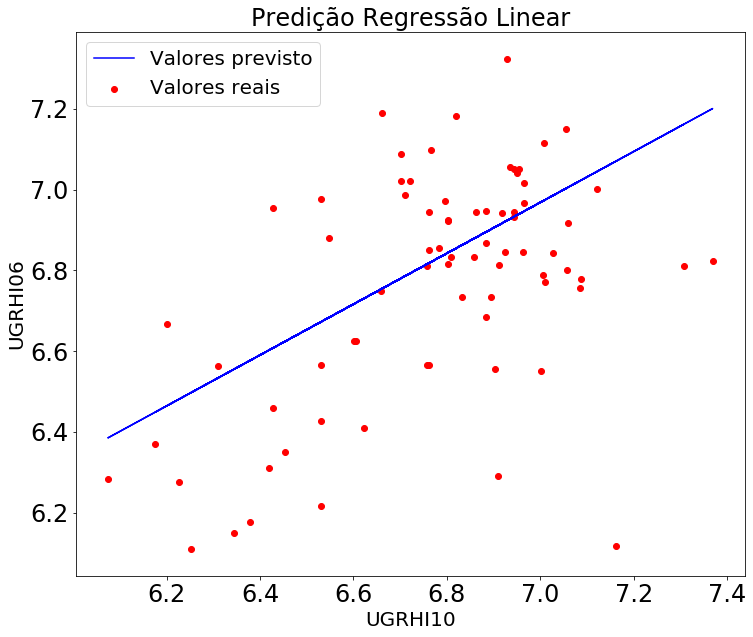

/home/anderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


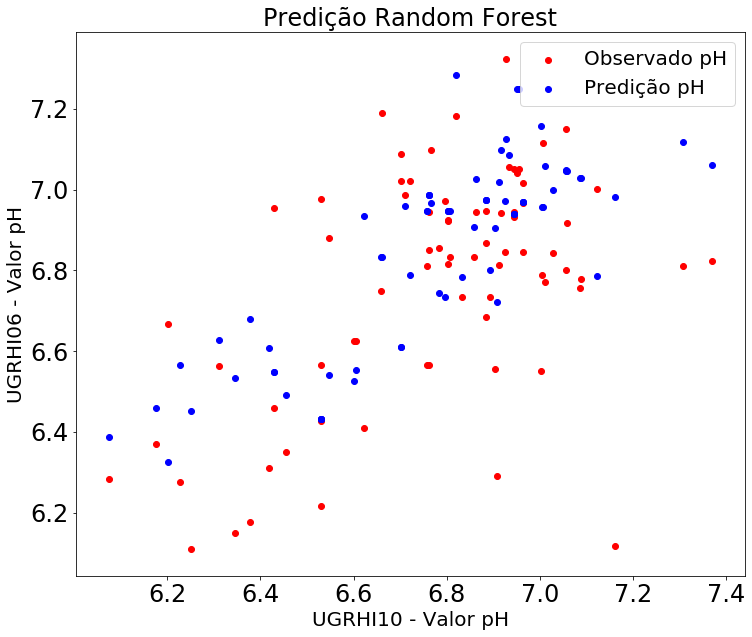

Train on 173 samples
Epoch 1/100
173/173 [==============================] - 0s 2ms/sample - loss: 0.5380 - mean_absolute_error: 0.5380
Epoch 2/100
173/173 [==============================] - 0s 82us/sample - loss: 0.5011 - mean_absolute_error: 0.5011
Epoch 3/100
173/173 [==============================] - 0s 130us/sample - loss: 0.4652 - mean_absolute_error: 0.4652
Epoch 4/100
173/173 [==============================] - 0s 101us/sample - loss: 0.4291 - mean_absolute_error: 0.4291
Epoch 5/100
173/173 [==============================] - 0s 118us/sample - loss: 0.3927 - mean_absolute_error: 0.3927
Epoch 6/100
173/173 [==============================] - 0s 133us/sample - loss: 0.3570 - mean_absolute_error: 0.3570
Epoch 7/100
173/173 [==============================] - 0s 116us/sample - loss: 0.3205 - mean_absolute_error: 0.3205
Epoch 8/100
173/173 [==============================] - 0s 173us/sample - loss: 0.2859 - mean_absolute_error: 0.2859
Epoch 9/100
173/173 [==============================] -

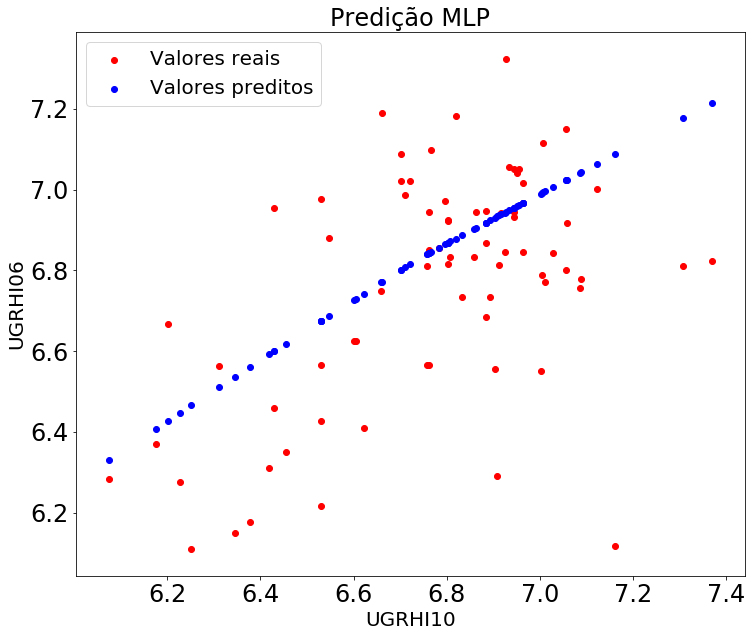

Train on 173 samples
Epoch 1/100
173/173 [==============================] - 1s 8ms/sample - loss: 0.5963 - mean_absolute_error: 0.5963
Epoch 2/100
173/173 [==============================] - 0s 124us/sample - loss: 0.5506 - mean_absolute_error: 0.5506
Epoch 3/100
173/173 [==============================] - 0s 145us/sample - loss: 0.5071 - mean_absolute_error: 0.5071
Epoch 4/100
173/173 [==============================] - 0s 131us/sample - loss: 0.4625 - mean_absolute_error: 0.4625
Epoch 5/100
173/173 [==============================] - 0s 214us/sample - loss: 0.4200 - mean_absolute_error: 0.4200
Epoch 6/100
173/173 [==============================] - 0s 179us/sample - loss: 0.3730 - mean_absolute_error: 0.3730
Epoch 7/100
173/173 [==============================] - 0s 164us/sample - loss: 0.3348 - mean_absolute_error: 0.3348
Epoch 8/100
173/173 [==============================] - 0s 221us/sample - loss: 0.2918 - mean_absolute_error: 0.2918
Epoch 9/100
173/173 [==============================] 

Epoch 71/100
173/173 [==============================] - 0s 198us/sample - loss: 0.1381 - mean_absolute_error: 0.1381
Epoch 72/100
173/173 [==============================] - 0s 118us/sample - loss: 0.1432 - mean_absolute_error: 0.1432
Epoch 73/100
173/173 [==============================] - 0s 111us/sample - loss: 0.1520 - mean_absolute_error: 0.1520
Epoch 74/100
173/173 [==============================] - 0s 215us/sample - loss: 0.1479 - mean_absolute_error: 0.1479
Epoch 75/100
173/173 [==============================] - 0s 194us/sample - loss: 0.1408 - mean_absolute_error: 0.1408
Epoch 76/100
173/173 [==============================] - 0s 206us/sample - loss: 0.1490 - mean_absolute_error: 0.1490
Epoch 77/100
173/173 [==============================] - 0s 180us/sample - loss: 0.1482 - mean_absolute_error: 0.1482
Epoch 78/100
173/173 [==============================] - 0s 202us/sample - loss: 0.1465 - mean_absolute_error: 0.1465
Epoch 79/100
173/173 [==============================] - 0s 253us

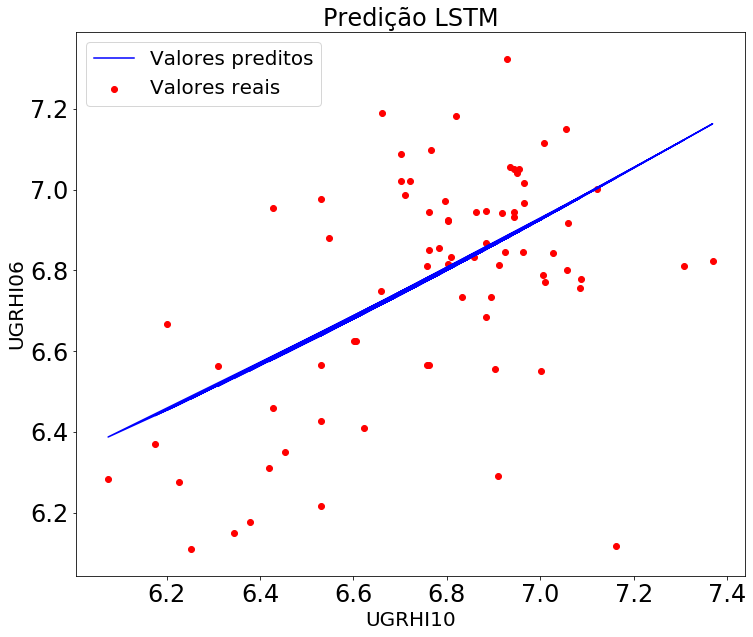

In [54]:
am = ['rl','rf','mlp','lstm']

for t in am:
    if t == 'rl':
        model = LinearRegression()
        
        #Treina o modelo
        model.fit(X_train,y_train)
        
        #Predição dos dados de teste
        y_pred = model.predict(X_test)

        y_pred_rl = sc.inverse_transform(y_pred)

        X_test_rl = sc.inverse_transform(X_test)
        y_test_rl = sc.inverse_transform(y_test)
        
        #Predição dos dados de treinamento
        y_predt = model.predict(X_train)
        y_predt_rl = sc.inverse_transform(y_predt)
        X_train_rl = sc.inverse_transform(X_train)
        
        plt.scatter(X_test_rl,y_test_rl,color='red', label='Valores reais')
        #plt.scatter(X_train,y_train,color='yellow', label='Dados treino')
        plt.plot(X_test_rl,y_pred_rl,color='blue',label='Valores previsto')
        plt.xlabel('UGRHI10')
        plt.ylabel('UGRHI06')
        plt.legend()
        plt.title('Predição Regressão Linear')
        plt.show()
        
        mape_treino_rl       = round(mape(y_predt_rl,X_train_rl)[0],4)
        rmse_treino_rl       = round(rmse(y_predt_rl,X_train_rl),4)
        r_treino_rl          = round(r2(y_predt_rl,X_train_rl),4)
        
        mape_teste_rl        = round(mape(y_pred_rl,y_test_rl)[0],4)
        rmse_teste_rl        = round(rmse(y_pred_rl,y_test_rl),4)
        r_teste_rl           = round(r2(y_pred_rl,y_test_rl),4)
        
    elif t == 'rf':
        model = RandomForestRegressor()
        
        #Treina o modelo
        model.fit(X_train,y_train)

        #Predição dados de teste
        y_pred = model.predict(X_test)
        y_pred_rf = sc.inverse_transform(y_pred.reshape(1, -1))

        X_test_rf = sc.inverse_transform(X_test)
        y_test_rf = sc.inverse_transform(y_test)
        
        #Predição dados de treinamento
        
        y_predt = model.predict(X_train)
        y_predt_rf = sc.inverse_transform(y_predt.reshape(1, -1))
        X_train_rf = sc.inverse_transform(X_train)
        
        plt.scatter(X_test_rf,y_test_rf,color='red', label='Observado pH')
        #plt.scatter(X_train,y_train,color='yellow', label='Dados treino')
        plt.scatter(X_test_rf,y_pred_rf.reshape(-1, 1),color='blue',label='Predição pH')
        plt.xlabel('UGRHI10 - Valor pH')
        plt.ylabel('UGRHI06 - Valor pH')
        plt.legend()
        plt.title('Predição Random Forest')
        plt.show()
        
        mape_treino_rf       = round(mape(y_predt_rf.reshape(-1,1),X_train_rf)[0],4)
        rmse_treino_rf       = round(rmse(y_predt_rf.reshape(-1,1),X_train_rf),4)
        r_treino_rf          = round(r2(y_predt_rf.reshape(-1,1),X_train_rf),4)
        
        mape_teste_rf        = round(mape(y_pred_rf.reshape(-1,1),y_test_rf)[0],4)
        rmse_teste_rf        = round(rmse(y_pred_rf.reshape(-1,1),y_test_rf),4)
        r_teste_rf           = round(r2(y_pred_rf.reshape(-1,1),y_test_rf),4)
        
    elif t == 'mlp':
        model = Sequential()
        model.add(Dense(units = 10, activation = 'relu'))
        model.add(Dense(units = 21, activation = 'relu'))
        model.add(Dense(units = 1, activation = 'linear'))
        model.compile(loss = 'mean_absolute_error', optimizer = 'adam',
                  metrics = ['mean_absolute_error'])

        #Treina o modelo
        model.fit(X_train,y_train, batch_size = 32, epochs = 100)
        
        #Predição com os dados de test
        y_pred = model.predict(X_test)
        y_pred_mlp = sc.inverse_transform(y_pred)

        X_test_mlp = sc.inverse_transform(X_test)
        y_test_mlp = sc.inverse_transform(y_test)
        
        #Predição com os dados de treinamento
        y_predt = model.predict(X_train)
        y_predt_mlp = sc.inverse_transform(y_predt)
        X_train_mlp = sc.inverse_transform(X_train)
        
        plt.scatter(X_test_mlp,y_test_mlp,color='red',marker = 'o',label='Valores reais')
        plt.scatter(X_test_mlp,y_pred_mlp,color='blue',label='Valores preditos')
        plt.xlabel('UGRHI10')
        plt.ylabel('UGRHI06')
        plt.legend()
        plt.title('Predição MLP')
        plt.show()
        
        mape_treino_mlp       = round(mape(y_predt_mlp,X_train_mlp)[0],4)
        rmse_treino_mlp       = round(rmse(y_predt_mlp,X_train_mlp),4)
        r_treino_mlp          = round(r2(y_predt_mlp,X_train_mlp),4)
        
        mape_teste_mlp        = round(mape(y_pred_mlp,y_test_mlp)[0],4)
        rmse_teste_mlp        = round(rmse(y_pred_mlp,y_test_mlp),4)
        r_teste_mlp        = round(r2(y_pred_mlp,y_test_mlp),4)
        
    else:
        
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
        
        model = Sequential()
        model.add(LSTM(units = 10, input_shape = (X_train.shape[1], 1)))
        model.add(Dense(10, activation = 'linear'))
        model.add(Dropout(0.2))
        model.add(Dense(1, activation = 'linear'))
        model.compile(loss = 'mean_absolute_error', optimizer = 'adam',
                  metrics = ['mean_absolute_error'])

        #Treina o modelo
        model.fit(X_train,y_train, batch_size = 32, epochs = 100)

        #Predição com dados de teste
        y_pred = model.predict(X_test)
        y_pred_lstm = sc.inverse_transform(y_pred)

        X_test_lstm = X_test.reshape((len(X_test),1))
        X_test_lstm = sc.inverse_transform(X_test_lstm)
        y_test_lstm = sc.inverse_transform(y_test)
        X_test_lstm.shape
        
        #Predição com dados de treinamento
        y_predt = model.predict(X_train)
        y_predt_lstm = sc.inverse_transform(y_predt)

        X_train_lstm = X_train.reshape((len(X_train),1))
        X_train_lstm = sc.inverse_transform(X_train_lstm)
        
        plt.scatter(X_test_lstm,y_test_lstm,color='red',marker = 'o',label='Valores reais')
        plt.plot(X_test_lstm,y_pred_lstm,color='blue', label='Valores preditos')
        plt.xlabel('UGRHI10')
        plt.ylabel('UGRHI06')
        plt.legend()
        plt.title('Predição LSTM')
        plt.show()
        
        mape_treino_lstm       = round(mape(y_predt_lstm,X_train_lstm)[0],4)
        rmse_treino_lstm       = round(rmse(y_predt_lstm,X_train_lstm),4)
        r_treino_lstm          = round(r2(y_predt_lstm,X_train_lstm),4)
        
        mape_teste_lstm        = round(mape(y_pred_lstm,y_test_lstm)[0],4)
        rmse_teste_lstm        = round(rmse(y_pred_lstm,y_test_lstm),4)
        r_teste_lstm        = round(r2(y_pred_lstm,y_test_lstm),4)
        
        
# intialise data of lists.
data_treino = {'AM':['Regressão Linear','Random Forest','MLP','LSTM'],
        'MAPE':[mape_treino_rl, mape_treino_rf, mape_treino_mlp,mape_treino_lstm],
        'RMSE':[rmse_treino_rl, rmse_treino_rf, rmse_treino_mlp,rmse_treino_lstm],
        'R²':[r_treino_rl, r_treino_rf, r_treino_mlp,r_treino_lstm],
        'TIPO':['TREINO', 'TREINO', 'TREINO', 'TREINO']}

# intialise data of lists.
data_teste = {'AM':['Regressão Linear','Random Forest','MLP','LSTM'],
        'MAPE':[mape_teste_rl, mape_teste_rf, mape_teste_mlp,mape_teste_lstm],
        'RMSE':[rmse_teste_rl, rmse_teste_rf, rmse_teste_mlp,rmse_teste_lstm],
        'R²':[r_teste_rl, r_teste_rf, r_teste_mlp,r_teste_lstm],
        'TIPO':['TESTE', 'TESTE', 'TESTE', 'TESTE']}
 
# Create DataFrame
df_resultados_treino = pd.DataFrame(data_treino)
df_resultados_teste = pd.DataFrame(data_teste)

In [55]:
df_resultados_treino

,AM,MAPE,RMSE,R²,TIPO
0,Regressão Linear,2.3891,0.1169,0.8189,TREINO
1,Random Forest,3.6568,0.1800,0.5706,TREINO
2,MLP,2.4225,0.1121,0.8336,TREINO
3,LSTM,2.2307,0.1113,0.8359,TREINO


In [56]:
df_resultados_teste

,AM,MAPE,RMSE,R²,TIPO
0,Regressão Linear,2.1708,0.2510,0.2167,TESTE
1,Random Forest,2.3206,0.2640,0.1334,TESTE
2,MLP,2.1631,0.2522,0.2092,TESTE
3,LSTM,2.1542,0.2460,0.2479,TESTE
